In [1]:
from multirotor import MultiRotor

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision.transforms as transforms

import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import pandas as pd

import seaborn as sns

sns.set_style("whitegrid")

In [2]:
class mfac(nn.Module):
    def __init__(self, layer_sizes):
        super(mfac, self).__init__()
        
        self.first_layer = torch.zeros(layer_sizes[0])
        
        self.hidden_layers = [
            nn.Sequential(nn.Linear(nlminus1, nl), nn.ReLU())
            for nl, nlminus1 in zip(layer_sizes[1:-1], layer_sizes)
        ]
        
        self.output_layer = nn.Linear(layer_sizes[-2], layer_sizes[-1])
        
        self.layers = nn.Sequential(*self.hidden_layers, self.output_layer)
        
    def forward(self, x):
        
        first_layer_tensor = torch.roll(self.first_layer, 1)
        first_layer_tensor[0] = x
        
        #HELP
        e = self.layers(first_layer_tensor)
        return e

In [3]:
# Simulation timing
time_start = 0
time_stop = 30
num_time_points = 1000
time = torch.linspace(time_start, time_stop, num_time_points)
time_step = time[1] - time[0]

In [4]:
mr = MultiRotor(dt=time_step)

# The input layer size
n0 = 5

# The output layer
nL = 1

# Hidden layers' sizes
neurons_per_layer = [13, 17]

# Preprend the input and append the output layer sizes
layer_sizes = [n0] + neurons_per_layer + [nL]

net = mfac(layer_sizes)

In [5]:
criterion = nn.MSELoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

In [6]:
# Altitude target (setpoint) is up 10m
altitude_setpoint = mr.get_altitude() + 10

In [7]:
for t in time:
    error = float(altitude_setpoint - mr.get_altitude())
    output = net(error)
    curr_altitude, curr_velocity = mr.step(abs(output.item()))
    
    optimizer.zero_grad()
    loss = criterion(output, torch.as_tensor([error]))
    loss.backward()
    optimizer.step()
    
    print(curr_altitude)

tensor(9.9961)
tensor(9.9399)
tensor(10.0727)
tensor(10.0891)
tensor(10.1643)
tensor(10.0131)
tensor(10.0216)
tensor(9.9156)
tensor(9.8157)
tensor(9.7833)
tensor(9.7426)
tensor(9.5679)
tensor(9.4449)
tensor(9.1869)
tensor(9.1035)
tensor(8.9580)
tensor(8.9062)
tensor(8.7128)
tensor(8.8597)
tensor(8.7209)
tensor(8.6892)
tensor(8.4751)
tensor(8.3836)
tensor(8.2268)
tensor(8.0237)
tensor(7.9298)
tensor(7.9178)
tensor(7.7329)
tensor(7.5834)
tensor(7.4945)
tensor(7.3596)
tensor(7.1730)
tensor(6.9090)
tensor(6.7730)
tensor(6.6079)
tensor(6.4083)
tensor(6.1620)
tensor(5.9797)
tensor(5.8459)
tensor(5.7560)
tensor(5.4887)
tensor(5.4153)
tensor(5.1591)
tensor(5.0063)
tensor(4.7164)
tensor(4.6046)
tensor(4.6247)
tensor(4.4519)
tensor(4.3021)
tensor(4.1792)
tensor(3.8745)
tensor(3.7910)
tensor(3.6958)
tensor(3.5286)
tensor(3.5065)
tensor(3.4858)
tensor(3.4492)
tensor(3.2440)
tensor(2.8668)
tensor(2.7248)
tensor(2.6239)
tensor(2.4873)
tensor(2.3794)
tensor(2.2620)
tensor(2.0474)
tensor(1.9803)
tenso

tensor(18.9743)
tensor(18.9862)
tensor(18.9356)
tensor(19.0840)
tensor(18.8883)
tensor(18.8038)
tensor(18.6206)
tensor(18.6847)
tensor(18.7539)
tensor(18.7453)
tensor(18.6854)
tensor(18.5824)
tensor(18.6762)
tensor(18.6516)
tensor(18.5707)
tensor(18.7090)
tensor(18.5251)
tensor(18.3499)
tensor(18.3776)
tensor(18.3774)
tensor(18.4270)
tensor(18.5947)
tensor(18.7088)
tensor(18.6158)
tensor(18.4641)
tensor(18.5065)
tensor(18.3080)
tensor(18.2186)
tensor(18.0144)
tensor(17.9236)
tensor(18.0252)
tensor(17.9846)
tensor(17.9883)
tensor(18.0307)
tensor(18.0520)
tensor(18.1072)
tensor(18.1660)
tensor(18.0926)
tensor(17.9904)
tensor(18.0924)
tensor(18.2460)
tensor(18.3070)
tensor(18.3417)
tensor(18.4418)
tensor(18.3610)
tensor(18.3368)
tensor(18.2231)
tensor(18.1785)
tensor(18.1709)
tensor(18.0307)
tensor(17.9832)
tensor(17.9588)
tensor(17.9745)
tensor(17.9635)
tensor(18.0280)
tensor(18.0096)
tensor(18.0146)
tensor(18.1474)
tensor(18.2462)
tensor(18.3851)
tensor(18.5292)
tensor(18.7349)
tensor(1

NameError: name 'frames' is not defined

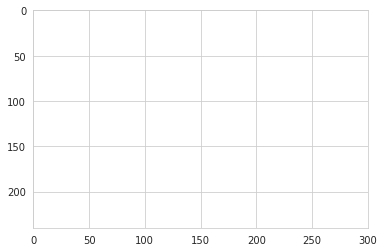

In [8]:
# frames.append(observation.copy())

# Initialize subplots
fig, ax = plt.subplots()

# Set axis of animation
ax.set(xlim=(0,300), ylim=(240,0))

# Initialize frame
frame = plt.imshow(frames[0])

def init():
    """
    Creates initial frame for animation.
    
    :return: (list) a list of the initial frame for animation
    """
    frame.set_data(frames[0])
    return [frame]

def animate(i):
    """
    Updates the state of the frame at each point of the animation.
    
    :param i: (ndarray) current image/frame
    :return: (list) a list of the current frame for animation
    """
    # Define the updated content of frame
    frame.set_array(i)
    return [frame]

from IPython.display import HTML

# Take images, functions, and other parameters and create an animation
ani = FuncAnimation(fig, animate, frames[::35], init_func = init, interval = 200)
HTML(ani.to_jshtml())
# -

# Save animation
ani.save("animation" + ".gif")